# Create Harvey's Wind Speed Frequency

The goal is to count the number of hours where the wind speed matches the Beaufort Wind Scale values.


## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

See the script "Merge_MultipleCSV" for details on how this file was generated.

In [3]:
weather_df_000 = pd.read_csv("Concatenated.csv", index_col = 0)
weather_df_000.head()

,Year,Month,Day,Time,WindDir,WindKmH
0,1953,1,1,00:00,34.0,3.0
1,1953,1,1,01:00,34.0,5.0
2,1953,1,1,02:00,34.0,5.0
3,1953,1,1,03:00,NaN,0.0
4,1953,1,1,04:00,34.0,2.0


## Data Wrangling

Include only the ice clear months

In [4]:
weather_df_001 = weather_df_000[weather_df_000['Month'].isin([4,5,6,7,8,9,10,11]) ]

# Check the difference in file shape
print(weather_df_000.shape)
print(weather_df_001.shape)

(552240, 6)
(368928, 6)


## Data Visualisation

### Histogram

Create a wind speed series and check for NULL values

In [6]:
wind_df_000 = weather_df_001['WindKmH']

wind_df_000.isnull().values.any()

True

Remove NULL values and check again.

In [7]:
wind_df_001 = wind_df_000.dropna(axis=0)

wind_df_001.isnull().values.any()

False

Plot the Histogram

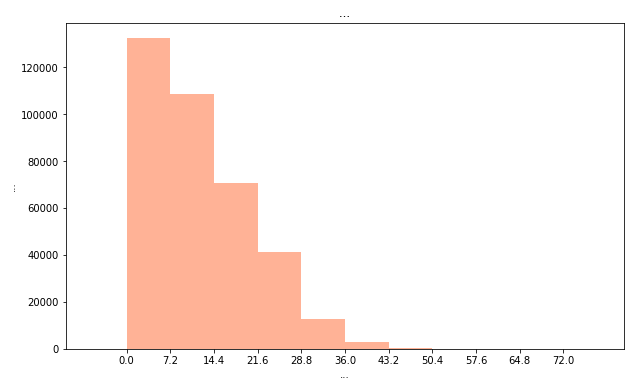

In [8]:
# partition the spread of the data into 10 bins of equal width
# results in bin edges being aligned with bars
count, bin_edges = np.histogram(wind_df_001,10) # sets size of bin

xmin = bin_edges[0] - 10 # add a buffer to the left of first bin
xmax = bin_edges[-1] + 10 # buffer to the right of last bin

wind_df_001.plot(kind = 'hist', 
figsize=(10,6), 
bins=10, # set bin size
alpha=0.6, #set transparency
xticks = bin_edges, 
color=['coral', 'darkslateblue', 'mediumseagreen'], 
stacked = True, 
xlim = (xmin, xmax)
)

plt.title(' ... ')
plt.ylabel('...')
plt.xlabel('...')

plt.show()

### Boxplot

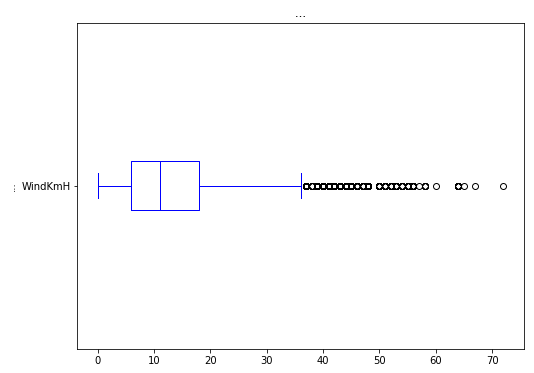

In [9]:
wind_df_001.plot(kind = 'box', 
figsize=(8, 6), 
color = 'blue', 
vert = False # if you prefer horizontal
)

plt.title(' ... ')
plt.ylabel('...')

plt.show()

## Calculate Wind Speed Probability

### Calculate Frequency of Wind Speeds (Beaufort Scale)

Create a wind speed series

In [40]:
wind_df_002 = wind_df_001.astype(int)
print(type(wind_df_002))
print(wind_df_002.shape)

<class 'pandas.core.series.Series'>
(368728,)


Define the Beaufort Scale Intervals and apply to Wind Speed

In [41]:
f'min is {min(wind_df_002)} and max is {max(wind_df_002)}'

'min is 0 and max is 72'

In [44]:
# define the bins for the beaufort scale
bins_tuples = [(-1,0), (0, 1), (1,5), (5,12), (12,19), (19,29), (29,38), (38,49), (49,61), (61,74), (74,88), (88,102), (102,117), (117,1000)]

bins = pd.IntervalIndex.from_tuples(bins_tuples)

In [47]:
# create a binned column
wind_df_002['binned'] = pd.cut(wind_df_002, bins=bins)

Find the frequency of hours associated with each Beaufort Scale value

In [49]:
# bin and count for each beaufort category
wind_df_003 = wind_df_002['binned'].value_counts()
print(wind_df_003)
print(type(wind_df_003))

(5, 12]        134905
(12, 19]        95567
(19, 29]        53022
(-1, 0]         39791
(1, 5]          32630
(29, 38]        10115
(38, 49]         2159
(0, 1]            406
(49, 61]          120
(61, 74]           13
(117, 1000]         0
(102, 117]          0
(88, 102]           0
(74, 88]            0
Name: WindKmH, dtype: int64
<class 'pandas.core.series.Series'>


In [66]:
wind_df_003.sort_index().values

array([ 39791,    406,  32630, 134905,  95567,  53022,  10115,   2159,
          120,     13,      0,      0,      0,      0], dtype=int64)

Create a table with Beaufort Scale and frequency

In [67]:
# create a table representing the beaufort scale, add Harvey Counts

# intialise data of lists. 
beaufort_data = {'Scale':['NA','0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], 
               'Description':['Zero','Calm', 'LightAir', 'LightBreeze', 'GentleBreeze', 'ModerateBreeze', 'FreshBreeze', 'StrongBreeze', 'NearGale', 'FreshGale', 'StrongGale', 'WholeGale', 'ViolentStorm', 'Hurricane'],
                 'Min. Speed':[0, 0, 1, 6, 12, 20, 29, 39, 50, 62, 75, 89, 103, 118],
              'Max. Speed':[0, 1, 5, 11, 19, 28, 38, 49, 61, 74, 88, 102, 117, 1000],
                'Frequency':wind_df_003.sort_index().values} 
  
# Create DataFrame 
beaufort_df = pd.DataFrame(beaufort_data) 
  
# Print the output. 
beaufort_df 


,Scale,Description,Min. Speed,Max. Speed,Frequency
0,NA,Zero,0,0,39791
1,0,Calm,0,1,406
2,1,LightAir,1,5,32630
3,2,LightBreeze,6,11,134905
4,3,GentleBreeze,12,19,95567
5,4,ModerateBreeze,20,28,53022
6,5,FreshBreeze,29,38,10115
7,6,StrongBreeze,39,49,2159
8,7,NearGale,50,61,120
9,8,FreshGale,62,74,13


### Calculate the Cumulative Sum

In [85]:
# Convert the Harvey Lake counts to a list
Frequency_list = beaufort_df['Frequency'].tolist()

# Reverse the list prior to the cumulative sum
Frequency_list.reverse()

# Perform cumulative sum
Wind_CumulSum = np.cumsum(Frequency_list)

# Convert to a list
Wind_CumulSum_list = Wind_CumulSum.tolist()

# Reverse the list to original configuration
Wind_CumulSum_list.reverse()

# Add to the dataframe
beaufort_df['Cumulative Sum'] = Wind_CumulSum_list
beaufort_df

,Scale,Description,Min. Speed,Max. Speed,Frequency,Cumulative Sum,Percent Of Record,Met or Exceeded
0,NA,Zero,0,0,39791,368728,10.791,100.000
1,0,Calm,0,1,406,328937,0.110,89.209
2,1,LightAir,1,5,32630,328531,8.849,89.098
3,2,LightBreeze,6,11,134905,295901,36.587,80.249
4,3,GentleBreeze,12,19,95567,160996,25.918,43.663
5,4,ModerateBreeze,20,28,53022,65429,14.380,17.745
6,5,FreshBreeze,29,38,10115,12407,2.743,3.365
7,6,StrongBreeze,39,49,2159,2292,0.586,0.622
8,7,NearGale,50,61,120,133,0.033,0.036
9,8,FreshGale,62,74,13,13,0.004,0.004


### Calculate Percent of Record Experiencing Specific Wind Speeds (Beaufort Scale)

In [86]:
beaufort_df['Percent Of Record'] = round(((beaufort_df['Frequency']/sum(beaufort_df['Frequency'])) * 100),3)
beaufort_df

,Scale,Description,Min. Speed,Max. Speed,Frequency,Cumulative Sum,Percent Of Record,Met or Exceeded
0,NA,Zero,0,0,39791,368728,10.791,100.000
1,0,Calm,0,1,406,328937,0.110,89.209
2,1,LightAir,1,5,32630,328531,8.849,89.098
3,2,LightBreeze,6,11,134905,295901,36.587,80.249
4,3,GentleBreeze,12,19,95567,160996,25.918,43.663
5,4,ModerateBreeze,20,28,53022,65429,14.380,17.745
6,5,FreshBreeze,29,38,10115,12407,2.743,3.365
7,6,StrongBreeze,39,49,2159,2292,0.586,0.622
8,7,NearGale,50,61,120,133,0.033,0.036
9,8,FreshGale,62,74,13,13,0.004,0.004


### Calculate Percent Specific Wind Speeds (Beaufort Scale) Were Met or Exceeded

In [87]:
beaufort_df['Met or Exceeded'] = round(((beaufort_df['Cumulative Sum']/sum(beaufort_df['Frequency'])) * 100),3)
beaufort_df

,Scale,Description,Min. Speed,Max. Speed,Frequency,Cumulative Sum,Percent Of Record,Met or Exceeded
0,NA,Zero,0,0,39791,368728,10.791,100.000
1,0,Calm,0,1,406,328937,0.110,89.209
2,1,LightAir,1,5,32630,328531,8.849,89.098
3,2,LightBreeze,6,11,134905,295901,36.587,80.249
4,3,GentleBreeze,12,19,95567,160996,25.918,43.663
5,4,ModerateBreeze,20,28,53022,65429,14.380,17.745
6,5,FreshBreeze,29,38,10115,12407,2.743,3.365
7,6,StrongBreeze,39,49,2159,2292,0.586,0.622
8,7,NearGale,50,61,120,133,0.033,0.036
9,8,FreshGale,62,74,13,13,0.004,0.004


**Output the File**

In [71]:
beaufort_df.to_csv("C:\\Users\\Andy\\Dropbox\\FactoryFloor\\Offline\\HarveyLake\\Chapter01_Surface\\Mazzella_Chap01_Table01_WindSpeedProbability_Raw.csv")